In [83]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [84]:
DATAPATH = './data/loan-prediction/dataset.csv'
dataset = pd.read_csv(DATAPATH, index_col='Loan_ID')


In [85]:
dataset.describe(include='all')


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [86]:
dataset.isnull().any()


Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [87]:
dataset.isnull().sum()


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

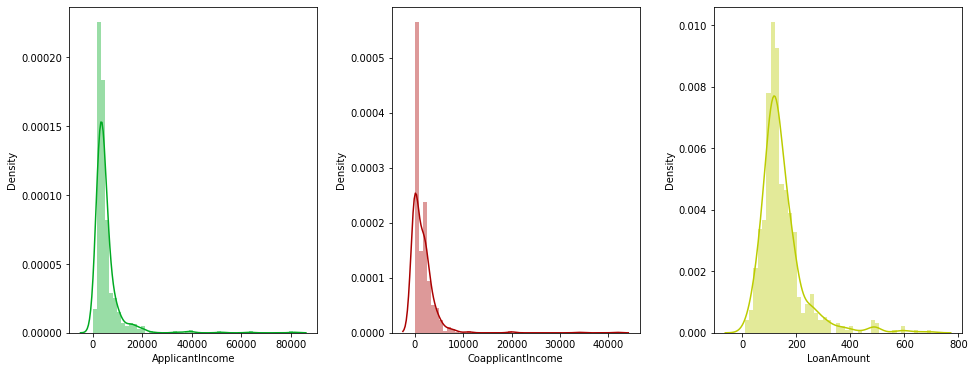

In [88]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
sns.distplot(dataset.ApplicantIncome, ax=axs[0], color='#00aa22')
sns.distplot(dataset.CoapplicantIncome, ax=axs[1], color='#aa0000')
sns.distplot(dataset.loc[dataset.LoanAmount.notnull(),
             'LoanAmount'], ax=axs[2], color='#bbcc00')
plt.subplots_adjust(wspace=.3, hspace=.3)


/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


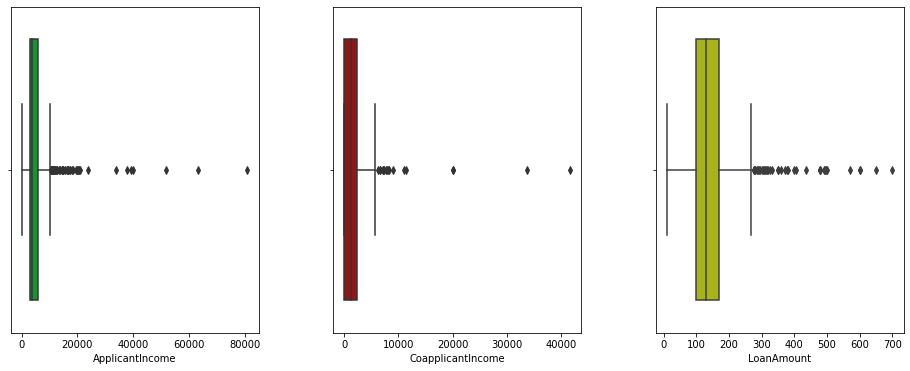

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
sns.boxplot(dataset.ApplicantIncome, ax=axs[0], color='#00aa22')
sns.boxplot(dataset.CoapplicantIncome, ax=axs[1], color='#aa0000')
sns.boxplot(dataset.loc[dataset.LoanAmount.notnull(),
                        'LoanAmount'], ax=axs[2], color='#bbcc00')
plt.subplots_adjust(wspace=.3, hspace=.3)


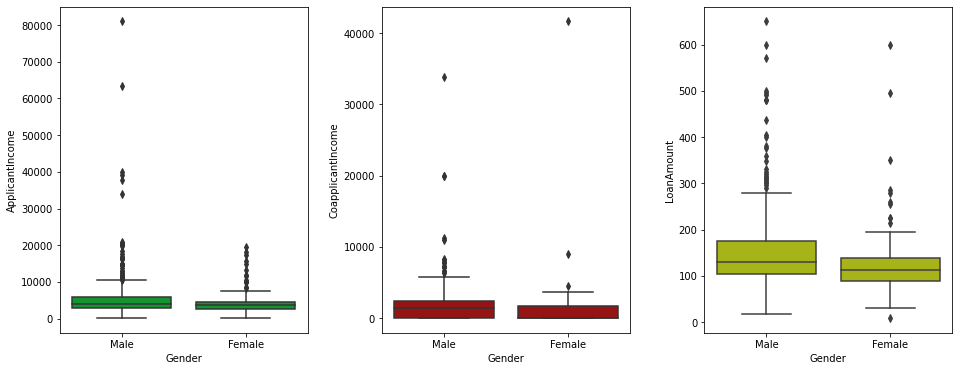

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
sns.boxplot(x=dataset.Gender, y=dataset.ApplicantIncome,
            ax=axs[0], color='#00aa22')
sns.boxplot(x=dataset.Gender, y=dataset.CoapplicantIncome,
            ax=axs[1], color='#aa0000')
sns.boxplot(x=dataset.Gender, y=dataset.loc[dataset.LoanAmount.notnull(),
                                            'LoanAmount'], ax=axs[2], color='#bbcc00')
plt.subplots_adjust(wspace=.3, hspace=.3)


In [91]:
from pandas.api.types import is_numeric_dtype

categorical_features = [
    col for col in dataset.columns if not is_numeric_dtype(dataset[col])]
categorical_features


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

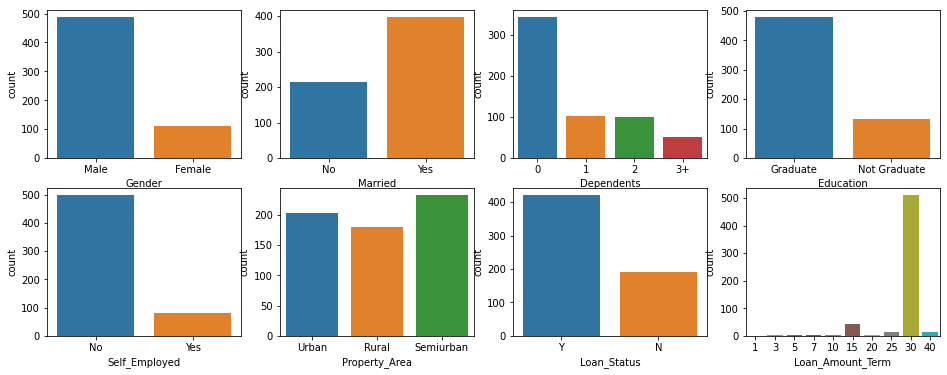

In [92]:
fig, axs = plt.subplots(2, 4, figsize=(16, 6))
i = 0
for feature in categorical_features:
    sns.countplot(
        dataset.loc[dataset[feature].notnull(), feature], ax=axs[i // 4, i % 4])
    i += 1

sns.countplot(dataset.loc[dataset.Loan_Amount_Term.notnull(
)]['Loan_Amount_Term'].map(lambda x: int(x/12)), ax=axs[1, 3])


In [93]:
dataset = dataset.apply(lambda x: x.fillna(x.median())
                        if is_numeric_dtype(x) else x.fillna(x.mode().iloc[0]))
dataset.describe(include='all')


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [94]:
stats.mstats.winsorize(dataset.ApplicantIncome, limits=0.05, inplace=True)
stats.mstats.winsorize(dataset.CoapplicantIncome, limits=0.05, inplace=True)
stats.mstats.winsorize(dataset.LoanAmount, limits=0.05, inplace=True)


masked_array(data=[128., 128.,  66., 120., 141., 267.,  95., 158., 168.,
                   296.,  70., 109., 200., 114.,  56., 125., 100.,  76.,
                   133., 115., 104., 296., 116., 112., 151., 191., 122.,
                   110.,  56., 120., 201.,  74., 106., 114., 296., 128.,
                   100., 144., 184., 110.,  80.,  56.,  75., 134.,  96.,
                    88.,  56., 144., 120., 144., 100., 120., 112., 134.,
                   286.,  97.,  96., 135., 180., 144., 120.,  99., 165.,
                   128., 116., 258., 126., 296., 125., 136., 172.,  97.,
                    81.,  95., 187., 113., 176., 110., 180., 130., 111.,
                   128., 167., 265.,  56., 136.,  99., 104., 210., 175.,
                   131., 188.,  81., 122.,  56., 128., 137.,  56., 115.,
                   131., 133., 151., 128., 128., 160., 100., 225., 120.,
                   216.,  94., 136., 139., 152., 128., 118., 185., 154.,
                    85., 175., 259., 180.,  56., 13

In [95]:
categorical_features_onehot = [
    cat for cat in categorical_features if cat != 'Loan_Status']
categorical_features_onehot


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [96]:
dataset = pd.get_dummies(dataset, columns=categorical_features_onehot)


In [97]:
columns = dataset.columns.to_list()
columns.insert(len(columns), columns.pop(columns.index('Loan_Status')))
dataset = dataset.reindex(columns=columns)
dataset.describe(include='all')


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422
mean,4913.416938,1389.211596,140.071661,342.410423,0.855049,0.182410,0.817590,0.346906,0.653094,0.586319,...,0.164495,0.083062,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990,NaN
std,3174.000637,1548.752960,59.518389,64.428629,0.352339,0.386497,0.386497,0.476373,0.476373,0.492894,...,0.371027,0.276201,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229,NaN
min,1880.000000,0.000000,56.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN


In [98]:
dataset.Loan_Status = dataset.Loan_Status.map(lambda x: 1 if x == 'Y' else -1)
dataset.describe(include='all')


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4913.416938,1389.211596,140.071661,342.410423,0.855049,0.182410,0.817590,0.346906,0.653094,0.586319,...,0.164495,0.083062,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990,0.374593
std,3174.000637,1548.752960,59.518389,64.428629,0.352339,0.386497,0.386497,0.476373,0.476373,0.492894,...,0.371027,0.276201,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229,0.927945
min,1880.000000,0.000000,56.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,14583.000000,5000.000000,296.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
dataset.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP001002,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
LP001003,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,-1
LP001005,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,1
LP001006,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,1
LP001008,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1


In [101]:
X = dataset.iloc[:, :-1]
y = dataset.Loan_Status


In [102]:
X.describe(include='all')


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4913.416938,1389.211596,140.071661,342.410423,0.855049,0.182410,0.817590,0.346906,0.653094,0.586319,0.166124,0.164495,0.083062,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990
std,3174.000637,1548.752960,59.518389,64.428629,0.352339,0.386497,0.386497,0.476373,0.476373,0.492894,0.372495,0.371027,0.276201,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229
min,1880.000000,0.000000,56.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,14583.000000,5000.000000,296.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
y.head()


Loan_ID
LP001002    1
LP001003   -1
LP001005    1
LP001006    1
LP001008    1
Name: Loan_Status, dtype: int64

In [105]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [110]:
def report(y_true, y_pred):
    print(f"Accuracy of model: {accuracy_score(y_true, y_pred):.3f}")
    print(f"ROC AUC of model: {roc_auc_score(y_true, y_pred):.3f}")


In [113]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
report(y_train, model.predict(X_train))
report(y_test, model.predict(X_test))
print(classification_report(y_test, model.predict(X_test)))


Accuracy of model: 0.798
ROC AUC of model: 0.689
Accuracy of model: 0.854
ROC AUC of model: 0.770
              precision    recall  f1-score   support

          -1       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [114]:
model = LogisticRegression(solver='liblinear')
kfold = StratifiedKFold(shuffle=True, random_state=42, n_splits=10)
cv = cross_validate(model, X, y, cv=kfold, scoring=('roc_auc', 'accuracy'), return_train_score=True)
pd.DataFrame(cv)


,fit_time,score_time,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy
0,0.005130,0.003122,0.753978,0.800098,0.806452,0.809783
1,0.007128,0.004773,0.805386,0.793204,0.822581,0.809783
2,0.004892,0.012757,0.720238,0.803305,0.822581,0.806159
3,0.004309,0.005334,0.709524,0.807971,0.758065,0.818841
4,0.008459,0.005120,0.815789,0.789550,0.819672,0.806510
5,0.005480,0.004926,0.751880,0.799285,0.819672,0.808318
6,0.004149,0.003184,0.708020,0.806221,0.803279,0.813743
7,0.005523,0.005494,0.749373,0.799665,0.754098,0.819168
8,0.004223,0.006134,0.820802,0.786553,0.819672,0.806510
9,0.005293,0.004565,0.795739,0.793718,0.836066,0.804702


In [115]:
model_and_hyperparameters = {
    'LogisticRegression': (LogisticRegression(solver='liblinear'), {'C': [0.005, 0.01, 0.5, 1, 2]})
}


In [120]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = model_and_hyperparameters['LogisticRegression'][0]
hyperparameters = model_and_hyperparameters['LogisticRegression'][1]
gs = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=kfold, scoring='accuracy', return_train_score=True, verbose=True)
gs.fit(X_train, y_train)
print(classification_report(y_test, gs.predict(X_test)))
report(y_test, gs.predict(X_test))
pd.DataFrame(gs.cv_results_)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
              precision    recall  f1-score   support

          -1       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

Accuracy of model: 0.854
ROC AUC of model: 0.770


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003130,0.000733,0.001449,0.000662,0.005,{'C': 0.005},0.68,0.693878,0.693878,0.693878,...,0.685520,0.685520,0.685520,0.685520,0.685520,0.687783,0.687783,0.687783,0.686355,0.001040
1,0.002768,0.000602,0.001374,0.000440,0.01,{'C': 0.01},0.68,0.693878,0.693878,0.693878,...,0.690045,0.687783,0.685520,0.685520,0.685520,0.687783,0.687783,0.687783,0.687033,0.001431
2,0.002680,0.000394,0.001144,0.000517,0.5,{'C': 0.5},0.80,0.877551,0.795918,0.795918,...,0.798643,0.800905,0.794118,0.794118,0.807692,0.805430,0.798643,0.796380,0.797918,0.005561
3,0.002669,0.000346,0.000996,0.000211,1,{'C': 1},0.82,0.877551,0.795918,0.795918,...,0.798643,0.794118,0.794118,0.794118,0.809955,0.805430,0.787330,0.796380,0.796334,0.006713
4,0.003064,0.000371,0.001241,0.000300,2,{'C': 2},0.82,0.877551,0.795918,0.795918,...,0.798643,0.796380,0.794118,0.794118,0.809955,0.805430,0.798643,0.796380,0.797918,0.005900
